<a href="https://colab.research.google.com/github/WannaBreakout/stock-prediction-regression/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment (Stock Prediction)

sentiment analyzer tool from this week's video

[NLTK-Twitter-Sentiment-Analysis](https://github.com/shangeth/NLTK-Twitter-Sentiment-Analysis)

[Search Tweets with Sentiment/Factual filters](https://twittersentimentanalysisnltk.herokuapp.com)


Go to Yahoo Finance and find a stock price that you want to predict.

Click on historical data, then download the CSV of that stocks price history

https://finance.yahoo.com/quote/DANOY/history?p=DANOY

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix



start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 9, 1)

df = web.DataReader("DANOY", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,17.770000,17.600000,17.620001,17.730000,328000.0,17.730000
2019-08-27,17.889999,17.730000,17.730000,17.820000,359800.0,17.820000
2019-08-28,17.860001,17.700001,17.760000,17.850000,226300.0,17.850000
2019-08-29,18.070000,17.950001,18.010000,17.969999,446900.0,17.969999
2019-08-30,18.049999,17.809999,18.040001,17.870001,210700.0,17.870001


Let’s start code out the **Rolling Mean**

and then plot it with [matplotlib](https://matplotlib.org)

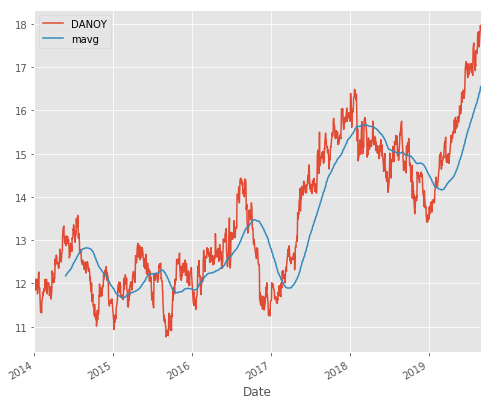

In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='DANOY')
mavg.plot(label='mavg')
plt.legend()

**Return Deviation** — to determine risk and return

*Expected **Return** measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment* — Investopedia.

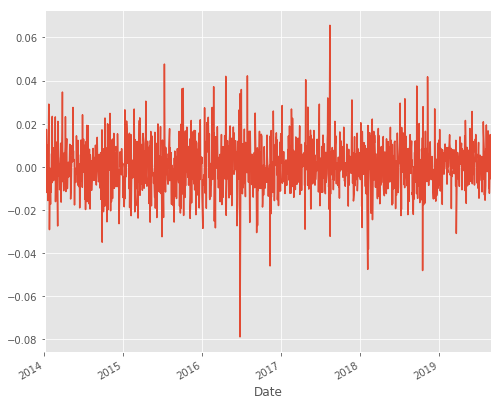

In [4]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

# Analysing your Competitors Stocks
In this segment, we are going to analyse on how one company performs in relative with its competitor. 

Let’s assume we are interested in technology companies and want to compare: 
Danone, Nestle, Kraft Heinz, J.M. Smucker, Ingredion

In [5]:
dfcomp = web.DataReader(['DANOY', 'NSRGY', 'KHC', 'SJM', 'INGR'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,DANOY,INGR,KHC,NSRGY,SJM
Date,,,,,
2019-08-26,17.730000,76.910004,25.58,110.419998,112.930000
2019-08-27,17.820000,73.250000,25.00,110.790001,103.690002
2019-08-28,17.850000,74.699997,25.17,111.160004,104.370003
2019-08-29,17.969999,75.889999,25.33,111.760002,102.830002
2019-08-30,17.870001,77.269997,25.52,112.389999,105.160004


In [0]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

Text(0, 0.5, 'Returns NSRGY')

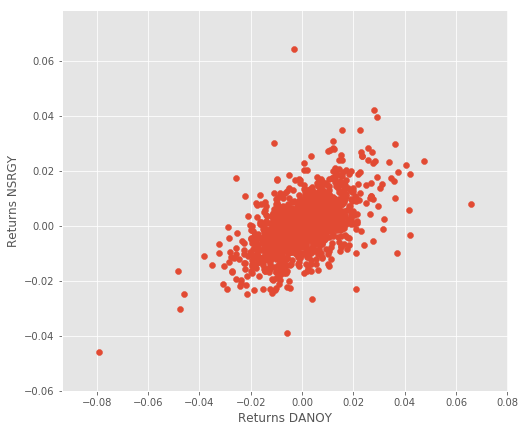

In [7]:
plt.scatter(retscomp.DANOY, retscomp.NSRGY)
plt.xlabel('Returns DANOY')
plt.ylabel('Returns NSRGY')

improve our analysis by plotting the scatter_matrix to visualize possible correlations among competing stocks. At the diagonal point, we will run **Kernel Density Estimate (KDE)** 

KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 

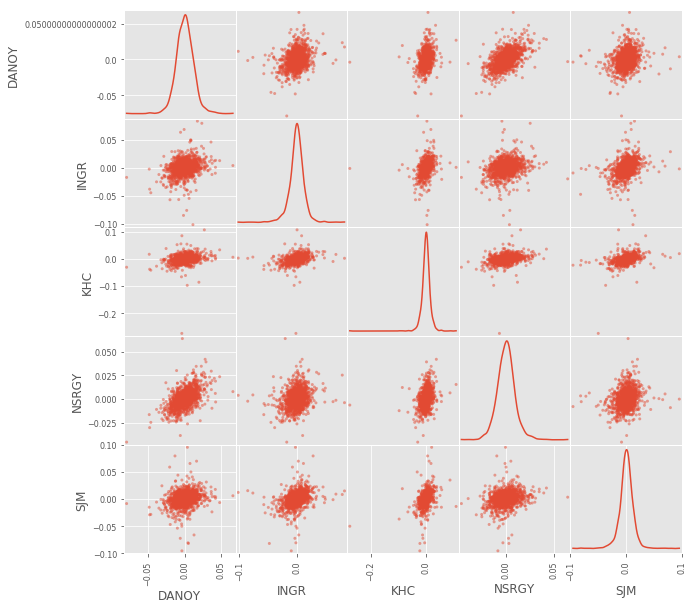

In [8]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

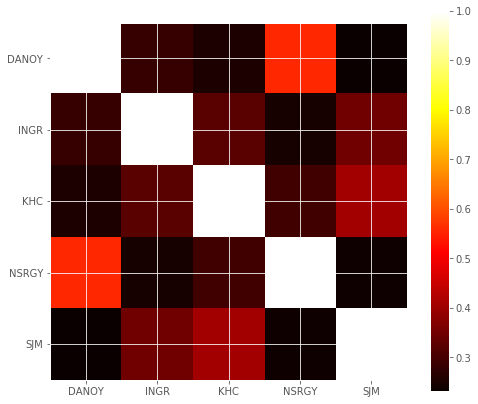

In [9]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

# Stocks Returns Rate and Risk

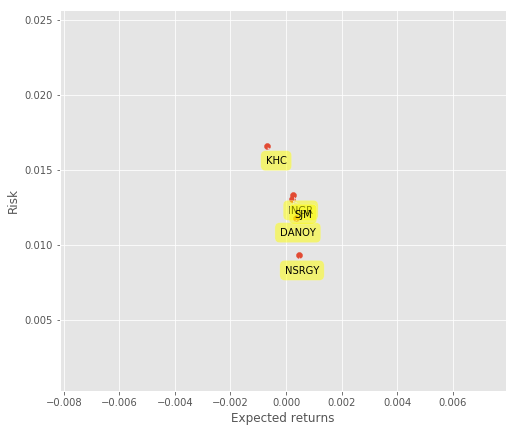

In [10]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting Stocks Price

To predict the return of the stocks in the next period - Prediction analysis

* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:

* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,14.20,14.01,14.20,14.01,3534000.0,11.954803
2014-01-03,14.13,14.02,14.08,14.11,223800.0,12.040133
2014-01-06,14.08,13.98,14.05,13.98,349000.0,11.929203
2014-01-07,14.20,14.02,14.02,14.17,2197800.0,12.091331
2014-01-08,14.03,13.95,14.03,14.00,10847900.0,11.946269


In [12]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-08-26,17.730000,328000.0,0.958827,0.624283
2019-08-27,17.820000,359800.0,0.897867,0.507615
2019-08-28,17.850000,226300.0,0.896358,0.506758
2019-08-29,17.969999,446900.0,0.667774,-0.222104
2019-08-30,17.870001,210700.0,1.343032,-0.942351


In [15]:
import math
import numpy as np
from sklearn import preprocessing


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(1426, 4)
Dimension of X (1411, 4)
Dimension of y (1411,)


In [0]:

from sklearn import svm
from sklearn.model_selection import train_test_split

# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Model Generation**

* To predict the return of the stocks in the next period - Prediction analysis

> * Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

**Build the model**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

# **Test the model**

In [23]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.8870603108697568
The quadratic regression 2 confidence is  0.8898394053202275
The quadratic regression 3 confidence is  0.8894301113108827
The knn regression confidence is  0.8400396732523489



**WARNING :** different companies that have different price trajectories over time.

Google really is very linear: Up and to the right
*thus linear regression wins on faulty logic*

We need to plot out the graph to make sense of it

In [27]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

confidence = clfreg.score(X_test, y_test)
print(confidence)

# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidence, forecast_out)

0.8870603108697568
[17.3575962  17.319689   17.41620263 17.45493742 17.72553776 17.80763615
 17.63800687 17.83465437 17.60600507 17.4372872  17.71703209 17.80976655
 17.83744023 17.97602448 17.8535344 ] 0.8870603108697568 15


**visualizing this information**

In [0]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

plug and play the existing Scikit-Learn library and train the model by selecting our X and y train sets

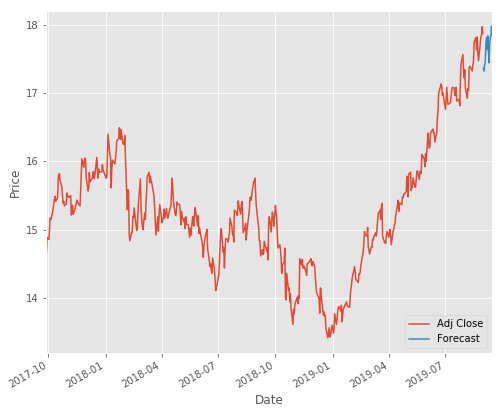

In [37]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()